In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#connecting to database
sql_connect = sqlite3.connect("Final_Project.db")

In [56]:
#verifying connection to one of the tables

#def is_opened(conn):
##    try:
   #     conn.execute("SELECT * FROM US_Pollution LIMIT 1")
   #     return True
   ## except sqlite3.ProgrammingError as e:
    #    print("Connection closed {}".format(e))
     #   return False
#print(is_opened(sql_connect))

In [60]:
#cursor allows us to execute SQL queries against a db
cursor = sql_connect.cursor()

In [61]:
#making a variable to the table I want to select from
query = 'SELECT * FROM India_Pollution'

In [62]:
#executing to the db and using the India Pollution table
results = cursor.execute(query).fetchall()

In [63]:
#reading results into pandas df
india_poll_table = pd.read_sql_query(query,sql_connect)

,city,coordinates,country,date,location,parameter,unit,value
0,Delhi,"{'latitude': 28.60909, 'longitude': 77.0325413}",IN,"{'local': '2020-03-31T05:30:00+05:30', 'utc': ...","NSIT Dwarka, Delhi - CPCB",so2,µg/m³,20.31
1,Delhi,"{'latitude': 28.6514781, 'longitude': 77.1473105}",IN,"{'local': '2020-03-31T05:30:00+05:30', 'utc': ...","Shadipur, Delhi - CPCB",so2,µg/m³,7.30
2,Delhi,"{'latitude': 28.6811736, 'longitude': 77.3025234}",IN,"{'local': '2020-03-31T05:30:00+05:30', 'utc': ...","IHBAS, Dilshad Garden, Delhi - CPCB",so2,µg/m³,11.78
3,Delhi,"{'latitude': 28.563262, 'longitude': 77.186937}",IN,"{'local': '2020-03-31T05:30:00+05:30', 'utc': ...","R K Puram, Delhi - DPCC",so2,µg/m³,8.50
4,Delhi,"{'latitude': 28.7500499, 'longitude': 77.1112615}",IN,"{'local': '2020-03-31T05:30:00+05:30', 'utc': ...","DTU, Delhi - CPCB",so2,µg/m³,5.80
...,...,...,...,...,...,...,...,...
95,Delhi,"{'latitude': 28.5504249, 'longitude': 77.2159377}",IN,"{'local': '2020-03-31T04:30:00+05:30', 'utc': ...","Sirifort, Delhi - CPCB",so2,µg/m³,3.60
96,Delhi,"{'latitude': 28.674045, 'longitude': 77.131023}",IN,"{'local': '2020-03-31T04:30:00+05:30', 'utc': ...","Punjabi Bagh, Delhi - DPCC",so2,µg/m³,9.80
97,Delhi,"{'latitude': 28.5710274, 'longitude': 77.0719006}",IN,"{'local': '2020-03-31T04:30:00+05:30', 'utc': ...","Dwarka-Sector 8, Delhi - DPCC",so2,µg/m³,11.50
98,Delhi,"{'latitude': 28.58028, 'longitude': 77.233829}",IN,"{'local': '2020-03-31T04:30:00+05:30', 'utc': ...","Jawaharlal Nehru Stadium, Delhi - DPCC",so2,µg/m³,22.00


Text(0.5, 0.98, 'SO2 values in Delhi India on March 31st')

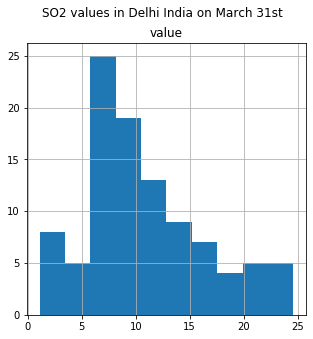

In [55]:
# Creating a histogram of the SO2 value in Delhi 
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)


query = '''
SELECT value
FROM India_Pollution
'''
pd.read_sql_query(query, sql_connect).hist(ax=ax)
fig.suptitle("SO2 values in Delhi India on March 31st")

#Value of SO2 in Delhi India on March 31st because of Covid-19 lockdowns

Text(0, 0.5, 'Value')

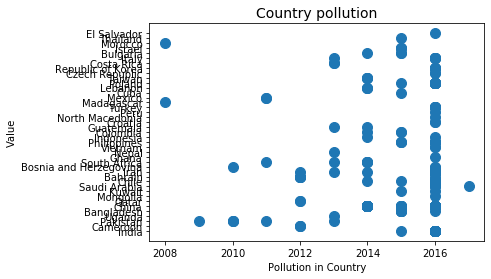

In [85]:
# Scatterplot from Polluted_Cities of which countries have 

query2 = 'SELECT year, Country FROM Polluted_Cities'
results2 = cursor.execute(query2).fetchall()
df = pd.DataFrame(list(results2), columns=['year', 'Country'])
x = df.year
y = df.Country
plt.title("Country pollution", fontsize="14")
plt.scatter(x,y,s=100)
plt.xlabel("Pollution in Country")
plt.ylabel("Value")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023114844248>],
      dtype=object)

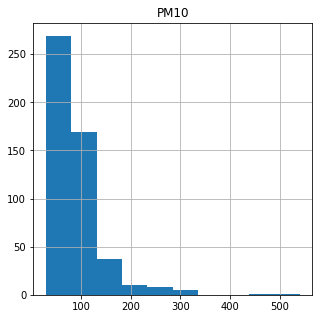

In [71]:
# Creating a histogram of the SO2 value in Delhi 
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)


query = '''
SELECT PM10
FROM Polluted_Cities
'''
pd.read_sql_query(query, sql_connect).hist(ax=ax)
#fig.suptitle("")


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002312A65CEC8>],
      dtype=object)

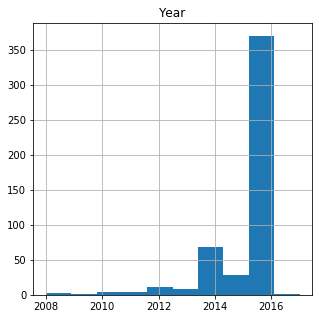

In [74]:
#Using the Polluted Cities Table
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)


query = '''
SELECT year
FROM Polluted_Cities
'''
pd.read_sql_query(query, sql_connect).hist(ax=ax)
fig.suptitle("Year with most air pollution entries")
